In [126]:
from PW_explorer.run_clingo import run_clingo
from PW_explorer.load_worlds import load_worlds
from PW_explorer.pwe_query import PWEQuery
from PW_explorer.pwe_helper import pw_slicer, rel_slicer
from PW_explorer.time_series import PWETimeSeriesModule
import pandas as pd
import numpy as np
import PW_explorer as pwe

In [131]:
with open('clingo_files/toh_enc.lp') as f:
    toh_encoding = list(map(str.strip, f.readlines()))
with open('clingo_files/toh_ins.lp') as f:
    toh_instance = list(map(str.strip, f.readlines()))
clingo_rules = toh_encoding+toh_instance
print("\n".join(clingo_rules))

% Generate
{ move(D,P,T) : disk(D), peg(P) } = 1 :- moves(M),  T = 1..M.
% define move(DISK, PEG, TIME)
% temporal move(_,T)
% define move(DISK, TIME)
% temporal move(_,_,T)
% define on(DISK, PEG, TIME)
% temporal on(_,_,T)
% define blocked(DISK, PEG, TIME)
% temporal blocked(_,_,T)
move(D,T)   :- move(D,_,T).
on(D,P,0)   :- init_on(D,P).
on(D,P,T)   :- move(D,P,T).
on(D,P,T+1) :- on(D,P,T), not move(D,T+1), not moves(T).
blocked(D-1,P,T+1) :- on(D,P,T), not moves(T).
blocked(D-1,P,T)   :- blocked(D,P,T), disk(D).
% Test
:- move(D,P,T), blocked(D-1,P,T).
:- move(D,T), on(D,P,T-1), blocked(D,P,T).
:- goal_on(D,P), not on(D,P,M), moves(M).
:- { on(D,P,T) } != 1, disk(D), moves(M), T = 1..M.
%% % Display
%% #show move/3.
#const num_disks=3.
% define peg(PEG)
peg(a;b;c).
% defien disk(DISK)
disk(1..num_disks).
% define init_on(DISK, PEG)
init_on(1..num_disks,a).
% define goal_on(DISK, PEG)
goal_on(1..num_disks,c).
moves(7).


In [132]:
# Careefully constructed example to yield exactly one PW
clingo_soln, meta_data = run_clingo(clingo_rules=clingo_rules)
print('\n'.join(clingo_soln))

Answer: 1
disk(1) disk(2) disk(3) peg(a) peg(b) peg(c) moves(7) init_on(1,a) init_on(2,a) init_on(3,a) on(1,a,0) on(2,a,0) on(3,a,0) blocked(0,a,1) blocked(1,a,1) blocked(2,a,1) goal_on(1,c) goal_on(2,c) goal_on(3,c) on(1,a,1) on(2,a,1) blocked(0,a,2) blocked(1,a,2) move(3,1) move(3,c,1) move(2,2) move(2,b,2) move(3,3) move(3,b,3) move(1,4) move(1,c,4) move(3,5) move(3,a,5) move(2,6) move(2,c,6) move(3,7) move(3,c,7) on(3,c,1) on(1,a,2) on(2,b,2) on(3,c,2) on(1,a,3) on(2,b,3) on(3,b,3) on(1,c,4) on(2,b,4) on(3,b,4) on(1,c,5) on(2,b,5) on(3,a,5) on(1,c,6) on(2,c,6) on(3,a,6) on(1,c,7) on(2,c,7) on(3,c,7) blocked(0,c,2) blocked(1,c,2) blocked(2,c,2) blocked(0,a,3) blocked(0,b,3) blocked(0,c,3) blocked(1,b,3) blocked(1,c,3) blocked(2,c,3) blocked(0,a,4) blocked(0,b,4) blocked(1,b,4) blocked(2,b,4) blocked(0,b,5) blocked(0,c,5) blocked(1,b,5) blocked(2,b,5) blocked(0,a,6) blocked(0,b,6) blocked(0,c,6) blocked(1,a,6) blocked(1,b,6) blocked(2,a,6) blocked(0,a,7) blocked(0,c,7) blocked(1,a,7)

In [133]:
meta_data

{'attr_defs': {'move_3': ['DISK', 'PEG', 'TIME'],
  'move_2': ['DISK', 'TIME'],
  'on_3': ['DISK', 'PEG', 'TIME'],
  'blocked_3': ['DISK', 'PEG', 'TIME'],
  'peg_1': ['PEG'],
  'init_on_2': ['DISK', 'PEG'],
  'goal_on_2': ['DISK', 'PEG']},
 'temporal_decs': {'move_2': [1],
  'move_3': [2],
  'on_3': [2],
  'blocked_3': [2]}}

In [134]:
pw_rels_dfs, rel_schemas, pw_objs = load_worlds(asp_output=clingo_soln, meta_data=meta_data, reasoner='clingo')

Number of Models: 1


In [135]:
list(map(lambda x: x.__dict__, rel_schemas))

[{'relation_name': 'disk_1', 'arity': 1, 'r_id': 0, 'meta_data': {}},
 {'relation_name': 'peg_1',
  'arity': 1,
  'r_id': 1,
  'meta_data': {'attr_defs': ['PEG']}},
 {'relation_name': 'moves_1', 'arity': 1, 'r_id': 2, 'meta_data': {}},
 {'relation_name': 'init_on_2',
  'arity': 2,
  'r_id': 3,
  'meta_data': {'attr_defs': ['DISK', 'PEG']}},
 {'relation_name': 'on_3',
  'arity': 3,
  'r_id': 4,
  'meta_data': {'attr_defs': ['DISK', 'PEG', 'TIME'], 'temporal_decs': [2]}},
 {'relation_name': 'blocked_3',
  'arity': 3,
  'r_id': 5,
  'meta_data': {'attr_defs': ['DISK', 'PEG', 'TIME'], 'temporal_decs': [2]}},
 {'relation_name': 'goal_on_2',
  'arity': 2,
  'r_id': 6,
  'meta_data': {'attr_defs': ['DISK', 'PEG']}},
 {'relation_name': 'move_2',
  'arity': 2,
  'r_id': 7,
  'meta_data': {'attr_defs': ['DISK', 'TIME'], 'temporal_decs': [1]}},
 {'relation_name': 'move_3',
  'arity': 3,
  'r_id': 8,
  'meta_data': {'attr_defs': ['DISK', 'PEG', 'TIME'], 'temporal_decs': [2]}}]

In [136]:
pw_rels_dfs.keys()

dict_keys(['disk_1', 'peg_1', 'moves_1', 'init_on_2', 'on_3', 'blocked_3', 'goal_on_2', 'move_2', 'move_3'])

In [137]:
pw_rels_dfs['on_3']

,pw,DISK,PEG,TIME
0,1,1,a,0
1,1,2,a,0
2,1,3,a,0
3,1,1,a,1
4,1,2,a,1
5,1,3,c,1
6,1,1,a,2
7,1,2,b,2
8,1,3,c,2
9,1,1,a,3


In [138]:
# All these are hard to make sense of, especially since there's time states involved.
# A simple groupby on the temporal columns would go a long way

In [139]:
sliced_dfs, sliced_rels, _ = rel_slicer(pw_rels_dfs, rel_schemas, None, ['move_3', 'on_3', 'init_on_2', 'peg_1', 'goal_on_2', 'disk_1'])
timestep_state_map = PWETimeSeriesModule.group_by_time(sliced_dfs, sliced_rels)

In [140]:
#timestep_state_map

In [141]:
# Not very fun to look at either

In [142]:
# Built in text based visualization for a clearer understanding of the problem
PWETimeSeriesModule.simple_timeseries_text_visualization(timestep_state_map, jupyter=True)

Constants:

peg_1:


,pw,PEG
0,1,a
1,1,b
2,1,c




init_on_2:


,pw,DISK,PEG
0,1,1,a
1,1,2,a
2,1,3,a




disk_1:


,pw,x1
0,1,1
1,1,2
2,1,3




goal_on_2:


,pw,DISK,PEG
0,1,1,c
1,1,2,c
2,1,3,c





---------------
Timestep 0:
---------------

on_3:


,pw,DISK,PEG
0,1,1,a
1,1,2,a
2,1,3,a





---------------
Timestep 1:
---------------

on_3:


,pw,DISK,PEG
3,1,1,a
4,1,2,a
5,1,3,c




move_3:


,pw,DISK,PEG
0,1,3,c





---------------
Timestep 2:
---------------

on_3:


,pw,DISK,PEG
6,1,1,a
7,1,2,b
8,1,3,c




move_3:


,pw,DISK,PEG
1,1,2,b





---------------
Timestep 3:
---------------

on_3:


,pw,DISK,PEG
9,1,1,a
10,1,2,b
11,1,3,b




move_3:


,pw,DISK,PEG
2,1,3,b





---------------
Timestep 4:
---------------

on_3:


,pw,DISK,PEG
12,1,1,c
13,1,2,b
14,1,3,b




move_3:


,pw,DISK,PEG
3,1,1,c





---------------
Timestep 5:
---------------

on_3:


,pw,DISK,PEG
15,1,1,c
16,1,2,b
17,1,3,a




move_3:


,pw,DISK,PEG
4,1,3,a





---------------
Timestep 6:
---------------

on_3:


,pw,DISK,PEG
18,1,1,c
19,1,2,c
20,1,3,a




move_3:


,pw,DISK,PEG
5,1,2,c





---------------
Timestep 7:
---------------

on_3:


,pw,DISK,PEG
21,1,1,c
22,1,2,c
23,1,3,c




move_3:


,pw,DISK,PEG
6,1,3,c



END


In [239]:
# More informative custom visualization (still a WIP)
# Inspired by: https://stackoverflow.com/questions/49391076/illustrate-tower-of-hanoi-with-ascii
def toh_viz(timestep_state_map):
    
    NUM_DISKS = len(timestep_state_map['constant']['disk_1'])
    NUM_PEGS = len(timestep_state_map['constant']['peg_1'])
    PEG_SIZE = NUM_DISKS + 2
    
    def get_state(state_df):
        pegs = [[] for _ in range(NUM_PEGS)]
        for i, row in state_df.iterrows():
            pegs[ord(row['PEG']) - ord('a')].append(NUM_DISKS+1-int(row['DISK']))
        pegs = [sorted(peg) for peg in pegs]
        return pegs
    
    def render_ring(ring):
        result = '*' * ring  # the character * repeated ring times.
        return result.center(PEG_SIZE) # add the spaces required
    def render_tower(tower, tower_id):
        result = [render_ring(0) for _ in range(NUM_DISKS-len(tower))] #[]
        for ring in tower:
            result.append(render_ring(ring))
        result.append(str(tower_id).center(PEG_SIZE))
        return result
    def render_final(towers): 
        tower_results = []
        for i, tower in enumerate(towers):
            tower_results.append(render_tower(tower, chr(ord('a')+i)))
        result = []
        for all_rows in zip(*tower_results):
            result.append(''.join(all_rows)) 
        return result
    
    print("Initial State:")
    print('\n'.join(render_final(get_state(timestep_state_map['constant']['init_on_2']))))
    print("")
    print("Goal:")
    print('\n'.join(render_final(get_state(timestep_state_map['constant']['goal_on_2']))))
    print("")
    for t in sorted(set(timestep_state_map.keys()) - set(['constant'])):
        print("Timestep: {}".format(t))
        print("")
        if 'move_3' in timestep_state_map[t]:
            for i, row in timestep_state_map[t]['move_3'].iterrows():
                print("Move {} to peg {}.".format('*'*(NUM_DISKS+1-int(row['DISK'])), row['PEG']))
        print('\n'.join(render_final(get_state(timestep_state_map[t]['on_3']))))
        print("")
    

In [240]:
toh_viz(timestep_state_map)

Initial State:
  *            
  **           
 ***           
  a    b    c  

Goal:
            *  
            ** 
           *** 
  a    b    c  

Timestep: 0

  *            
  **           
 ***           
  a    b    c  

Timestep: 1

Move * to peg c.
               
  **           
 ***        *  
  a    b    c  

Timestep: 2

Move ** to peg b.
               
               
 ***   **   *  
  a    b    c  

Timestep: 3

Move * to peg b.
               
       *       
 ***   **      
  a    b    c  

Timestep: 4

Move *** to peg c.
               
       *       
       **  *** 
  a    b    c  

Timestep: 5

Move * to peg a.
               
               
  *    **  *** 
  a    b    c  

Timestep: 6

Move ** to peg c.
               
            ** 
  *        *** 
  a    b    c  

Timestep: 7

Move * to peg c.
            *  
            ** 
           *** 
  a    b    c  



In [ ]:
# NUM_DISKS = 3
# NUM_PEGS = 3
# toh_edge_rules = []
# toh_edge_rules.append('peg({})'.format(';'.join([chr(ord('a')+i) for i in range(NUM_PEGS)])))
# for i in range(NUM_DISKS):
#     toh_edge_rules.append('e({}, {}) :- {}, {}, {}, {}.'.

In [150]:
with open('clingo_files/toh_edges.lp4') as f:
    toh_edges = list(map(str.strip, f.readlines()))
clingo_rules = toh_edges
print("\n".join(clingo_rules))

#const num_disks=3.
% define peg(PEG_ID)
peg(a;b;c).

% define e(DISK1_INIT_PEG, DISK2_INIT_PEG, DISK3_INIT_PEG, DISK1_FINAL_PEG, DISK2_FINAL_PEG, DISK3_FINAL_PEG)
e(D1, D2, D3, D1_, D2, D3) :- peg(D1), peg(D2), peg(D3), peg(D1_), D1 != D1_.
e(D1, D2, D3, D1, D2_, D3) :- peg(D1), peg(D2), peg(D3), peg(D2_), D2 != D2_, D1 != D2, D1 != D2_.
e(D1, D2, D3, D1, D2, D3_) :- peg(D1), peg(D2), peg(D3), peg(D3_), D3 != D3_, D1 != D3, D2 != D3, D1 != D3_, D2 != D3_.


In [151]:
clingo_soln, meta_data = run_clingo(clingo_rules=clingo_rules)
print('\n'.join(clingo_soln))

Answer: 1
peg(a) peg(b) peg(c) e(b,a,a,a,a,a) e(c,a,a,a,a,a) e(b,b,a,a,b,a) e(c,b,a,a,b,a) e(b,c,a,a,c,a) e(c,c,a,a,c,a) e(b,a,b,a,a,b) e(c,a,b,a,a,b) e(b,b,b,a,b,b) e(c,b,b,a,b,b) e(b,c,b,a,c,b) e(c,c,b,a,c,b) e(b,a,c,a,a,c) e(c,a,c,a,a,c) e(b,b,c,a,b,c) e(c,b,c,a,b,c) e(b,c,c,a,c,c) e(c,c,c,a,c,c) e(a,a,a,b,a,a) e(c,a,a,b,a,a) e(a,b,a,b,b,a) e(c,b,a,b,b,a) e(a,c,a,b,c,a) e(c,c,a,b,c,a) e(a,a,b,b,a,b) e(c,a,b,b,a,b) e(a,b,b,b,b,b) e(c,b,b,b,b,b) e(a,c,b,b,c,b) e(c,c,b,b,c,b) e(a,a,c,b,a,c) e(c,a,c,b,a,c) e(a,b,c,b,b,c) e(c,b,c,b,b,c) e(a,c,c,b,c,c) e(c,c,c,b,c,c) e(a,a,a,c,a,a) e(b,a,a,c,a,a) e(a,b,a,c,b,a) e(b,b,a,c,b,a) e(a,c,a,c,c,a) e(b,c,a,c,c,a) e(a,a,b,c,a,b) e(b,a,b,c,a,b) e(a,b,b,c,b,b) e(b,b,b,c,b,b) e(a,c,b,c,c,b) e(b,c,b,c,c,b) e(a,a,c,c,a,c) e(b,a,c,c,a,c) e(a,b,c,c,b,c) e(b,b,c,c,b,c) e(a,c,c,c,c,c) e(b,c,c,c,c,c) e(c,b,a,c,a,a) e(b,c,a,b,a,a) e(c,b,b,c,a,b) e(b,c,b,b,a,b) e(c,b,c,c,a,c) e(b,c,c,b,a,c) e(c,a,a,c,b,a) e(a,c,a,a,b,a) e(c,a,b,c,b,b) e(a,c,b,a,b,b) e(c,a,c,c

In [154]:
meta_data

{'attr_defs': {'peg_1': ['PEG_ID'],
  'e_6': ['DISK1_INIT_PEG',
   'DISK2_INIT_PEG',
   'DISK3_INIT_PEG',
   'DISK1_FINAL_PEG',
   'DISK2_FINAL_PEG',
   'DISK3_FINAL_PEG']},
 'temporal_decs': {}}

In [152]:
pw_rels_dfs, rel_schemas, pw_objs = load_worlds(asp_output=clingo_soln, meta_data=meta_data, reasoner='clingo')

Number of Models: 1


In [153]:
pw_rels_dfs.keys()

dict_keys(['peg_1', 'e_6'])

In [155]:
pw_rels_dfs['e_6']

,pw,DISK1_INIT_PEG,DISK2_INIT_PEG,DISK3_INIT_PEG,DISK1_FINAL_PEG,DISK2_FINAL_PEG,DISK3_FINAL_PEG
0,1,b,a,a,a,a,a
1,1,c,a,a,a,a,a
2,1,b,b,a,a,b,a
3,1,c,b,a,a,b,a
4,1,b,c,a,a,c,a
5,1,c,c,a,a,c,a
6,1,b,a,b,a,a,b
7,1,c,a,b,a,a,b
8,1,b,b,b,a,b,b
9,1,c,b,b,a,b,b


In [244]:
import networkx as nx

In [175]:
from nxpd import draw
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

In [241]:
G = nx.Graph()
edges = []
for i, row in pw_rels_dfs['e_6'].iterrows():
    start_node = "{}{}{}".format(row['DISK1_INIT_PEG'], row['DISK2_INIT_PEG'], row['DISK3_INIT_PEG'])
    end_node = "{}{}{}".format(row['DISK1_FINAL_PEG'], row['DISK2_FINAL_PEG'], row['DISK3_FINAL_PEG'])
    G.add_edge(start_node, end_node)
    edges.append((start_node, end_node))

In [242]:
G.graph['layout'] = 'neato'
G.graph['rankdir'] = 'TB'

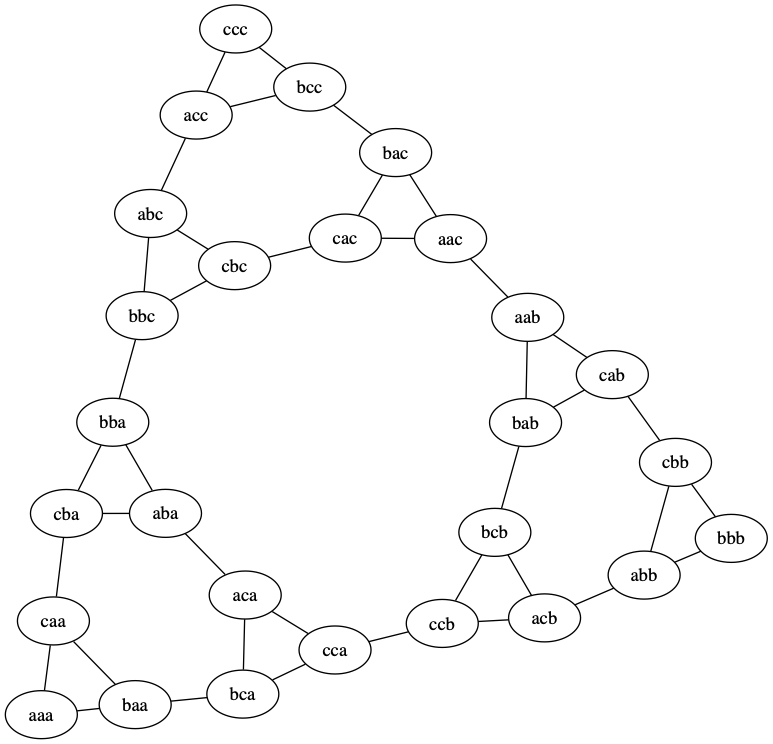

In [243]:
draw(G)

In [247]:
list(nx.all_pairs_shortest_path(G))

[('baa',
  {'baa': ['baa'],
   'aaa': ['baa', 'aaa'],
   'caa': ['baa', 'caa'],
   'bca': ['baa', 'bca'],
   'cba': ['baa', 'caa', 'cba'],
   'aca': ['baa', 'bca', 'aca'],
   'cca': ['baa', 'bca', 'cca'],
   'aba': ['baa', 'caa', 'cba', 'aba'],
   'bba': ['baa', 'caa', 'cba', 'bba'],
   'ccb': ['baa', 'bca', 'cca', 'ccb'],
   'bbc': ['baa', 'caa', 'cba', 'bba', 'bbc'],
   'acb': ['baa', 'bca', 'cca', 'ccb', 'acb'],
   'bcb': ['baa', 'bca', 'cca', 'ccb', 'bcb'],
   'abc': ['baa', 'caa', 'cba', 'bba', 'bbc', 'abc'],
   'cbc': ['baa', 'caa', 'cba', 'bba', 'bbc', 'cbc'],
   'abb': ['baa', 'bca', 'cca', 'ccb', 'acb', 'abb'],
   'bab': ['baa', 'bca', 'cca', 'ccb', 'bcb', 'bab'],
   'acc': ['baa', 'caa', 'cba', 'bba', 'bbc', 'abc', 'acc'],
   'cac': ['baa', 'caa', 'cba', 'bba', 'bbc', 'cbc', 'cac'],
   'bbb': ['baa', 'bca', 'cca', 'ccb', 'acb', 'abb', 'bbb'],
   'cbb': ['baa', 'bca', 'cca', 'ccb', 'acb', 'abb', 'cbb'],
   'aab': ['baa', 'bca', 'cca', 'ccb', 'bcb', 'bab', 'aab'],
   'cab': ['b